<h1>Simulacion numerica LAB01</h1>

A continuacion se simularan los valores para obtener el filtro deseado.

In [2]:
import numpy as np
from scipy import signal as signal
from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq,tfcascade,pretty_print_lti


#parametros del filtro a diseñar

fp2 = 1180.45
fp1 = 847.12
fs1 = 100
fs2 = 10    * 10**3
alpha_max = 2 
alpha_min = 15

BW = fp2 - fp1

print("Caracteristicas del filtro")

print("Frecuencias de stop:")
print(f"Fs1={fs1}Hz\nFs2={fs2}Hz")

print(f"Frecuencias de corte:")
print(f"Fp1={fp1}Hz\nFp2={fp2}Hz")

norma_f = np.sqrt(fp1*fp2)

print(f"Frecuencia central: {round(norma_f,3)}Hz")


Caracteristicas del filtro
Frecuencias de stop:
Fs1=100Hz
Fs2=10000Hz
Frecuencias de corte:
Fp1=847.12Hz
Fp2=1180.45Hz
Frecuencia central: 999.991Hz


Una vez obtenidos los parametros del filtro pasa bandas, se procede a normalizar los valores mediante la norma de frecuencia.


In [3]:
#calculo norma de frecuencia y la aplico a los valores del filtro

wp1_n = fp1 / norma_f 
wp2_n = fp2 / norma_f
ws1_n = fs1 / norma_f
ws2_n = fs2 / norma_f

BW = wp2_n - wp1_n
Q = 1/BW

print(f"Valores normalizados")
print(f"Valor de norma = Wo = {round(2*np.pi*norma_f,2)}rad/Seg\n")

print("W de stop normalizadas:")
print(f"Ws1={round(ws1_n,2)}rad/Seg\nWs2={round(ws2_n,2)}rad/Seg")

print(f"W de corte normalizadas:")
print(f"Wp1={round(wp1_n,2)}rad/Seg\nWp2={round(wp2_n,2)}rad/Seg")

print(f"W central: 1 rad/Seg")
print(f"BW normalizado = {round(BW,2)}")
print(f"Q = {round(Q,2)}")


Valores normalizados
Valor de norma = Wo = 6283.13rad/Seg

W de stop normalizadas:
Ws1=0.1rad/Seg
Ws2=10.0rad/Seg
W de corte normalizadas:
Wp1=0.85rad/Seg
Wp2=1.18rad/Seg
W central: 1 rad/Seg
BW normalizado = 0.33
Q = 3.0


Una vez normalizadas las frecuencias del filtro procedemos a transformarlo a un filtro pasa bandas. Para ello se aplica el nucleo de transformacion y se toman los valores que hagan al filtro mas exigente.

In [4]:
#transformacion a filtro pasa bajos
# valores de omega con nucleo de transformacion (para plantilla de pasa bajos)

omega_s1=  Q * (ws1_n**2 - 1)/ws1_n
omega_s2=  Q * (ws2_n**2 - 1)/ws2_n
omega_p1=  Q * (wp1_n**2 - 1)/wp1_n
omega_p2=  Q * (wp2_n**2 - 1)/wp2_n

# elijo los valores mas exigentes para el filtro (valor mas chico en modulo)

omega_s = omega_s2
omega_p = omega_p2

print("Plantilla pasa bajos")
print(f"Wp={round(omega_p,2)} rad/Seg\nWs={round(omega_s,2)} rad/Seg")
print(f"Atenuacion banda de paso maxima={alpha_max}dB")
print(f"Atenuacion banda de stop minima={alpha_min}dB")


Plantilla pasa bajos
Wp=1.0 rad/Seg
Ws=29.7 rad/Seg
Atenuacion banda de paso maxima=2dB
Atenuacion banda de stop minima=15dB


Una vez obtenidos los parametros del filtro deseado se procede a diseñarlo mediante el metodo de filtro chebyshev

In [5]:

#obtengo filtro chebby
print("Calculo del N y epsilon del filtro:")

epsilon = np.sqrt((10**(alpha_max/10)) - 1) 
print(f"Epsilon = {round(epsilon,2)}")

for n in range(1,5): # veo que numero de N se necesita para la plantilla del PB
    alpha_min_c = 10 * np.log10(1+ epsilon**2 * np.cosh(n * np.arccosh(omega_s))**2 )
    print(f"Alpha min={round(alpha_min_c,2)} para un N={n}")
    if alpha_min < alpha_min_c:
       alpha_min = alpha_min 
       break


Calculo del N y epsilon del filtro:
Epsilon = 0.76
Alpha min=27.13 para un N=1


In [6]:
# Valores calculados para N=1

num_c= [1/epsilon]
den_c= [1, 1/epsilon]
H1 = signal.TransferFunction(num_c, den_c)

print("Transferencia calculada")

pretty_print_lti(num_c,den_c)


Transferencia calculada


<IPython.core.display.Math object>

Todos estos pasos se pueden verificar mediante el uso de la funcion Cheby1 de la biblioteca singal, que devuelve los coeficientes del filtro deseado para una determinada atenuacion en la banda de paso y un determinado orden.

In [7]:
# Compruebo los valores obtenidos

atenuacion_deseada = 2  # Atenuación deseada en la banda de paso (en decibeles)
wp = 1 # Frecuencia de corte del filtro (en hertz)
N = 1
num, den = signal.cheby1(N, atenuacion_deseada, wp, btype='low', analog=True, output='ba')

H2 = signal.TransferFunction(num, den)
print("Transferencia del filtro pasa bajos (forma directa)")

pretty_print_lti(num,den)


Transferencia del filtro pasa bajos (forma directa)


<IPython.core.display.Math object>

Como podemos observar la transferencia obtenida por el metodo tradicional coincide con la obtenida en forma numerica directa.
A continuacion se transforma la transferencia aplicando el nucleo de transformacion para asi obtener el filtro pasa bandas.

Transferencia Pasa bandas (aplicando nucleo de transformacion)


<IPython.core.display.Math object>

Ceros transferencia: [-0.21792641+0.97596521j -0.21792641-0.97596521j]
Polos de la transferencia: [0.]


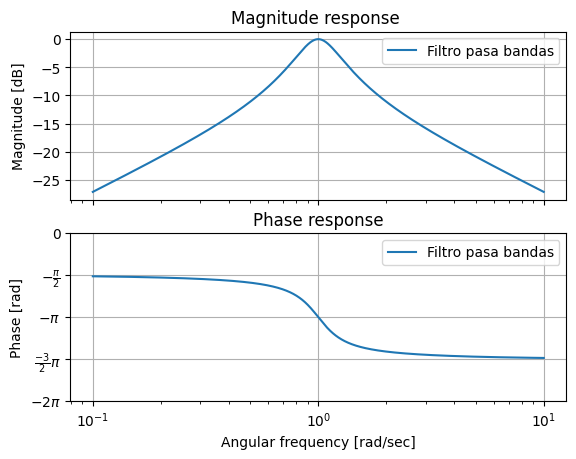

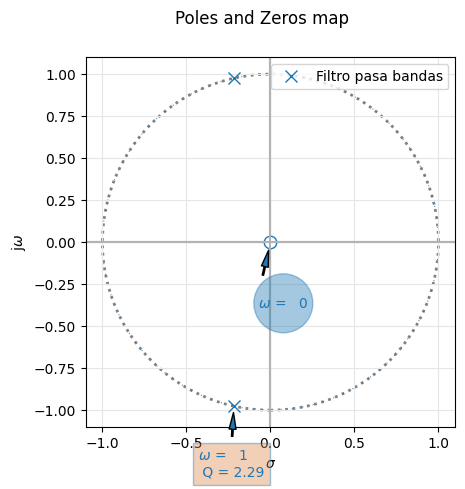

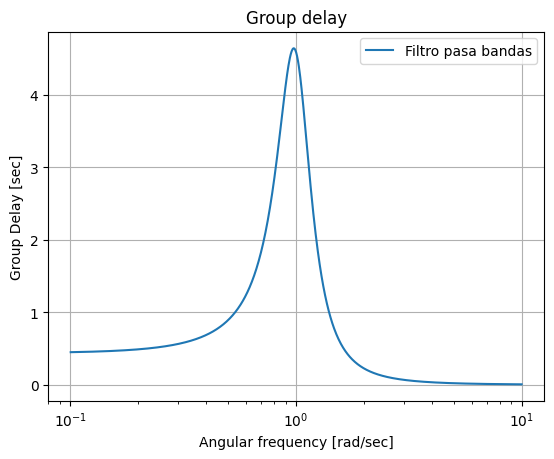

In [8]:
#Aplico nucleo de tranformacion para obtener el filtro pasa bandas

num = [(-1)/(epsilon*Q),0]
den = [1,1/(epsilon*Q),1]

H3 = signal.TransferFunction(num,den)
analyze_sys(H3,"Filtro pasa bandas")
print("Transferencia Pasa bandas (aplicando nucleo de transformacion)")
pretty_print_lti(num,den)
ceros = np.roots(den)
polos = np.roots(num)
print(f"Ceros transferencia: {ceros}\nPolos de la transferencia: {polos}")


<h1>Determinacion de los componentes</h1>

Para el calculo de los componentes se utilizo el siguiente script que permite calcular de manera automatica los valores de los componentes segun lo que se desee en el filtro.


In [17]:
import numpy as np
## Calculadora de conmponentes

Rf1 = 150     * 10 **3    # Suponer un valor
RG  = 50    * 10 **3
C   = 1     * 10 **-9
wn  = 1     * 10 **3  * 2 * np.pi  # poner valor de wn deseado
Q   = 1/0.435                 # poner valor de Q deseado


RQ  = (RG/2) * (Rf1 * C * wn)/(Q - Rf1*C*wn)
Rf2 = 1/(Rf1 * C**2 * wn**2 )

print("Los valores de los componentes a poner son:")

print(f" RQ = {RQ}")
print(f" Rf1 = {Rf1}")
print(f" Rf2 = {Rf2}")



Los valores de los componentes a poner son:
 RQ = 17371.290011897025
 Rf1 = 150000
 Rf2 = 168868.6394038963


<h1>Mediciones</h1>

Se procede a levantar las curvas obtenidas del barrido en frecuencia manual.

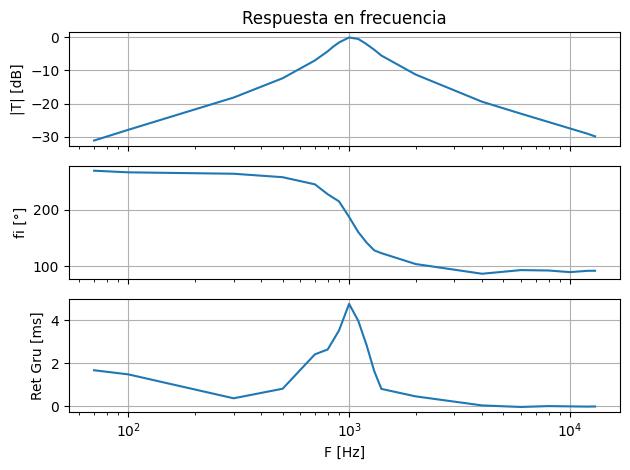

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Levanto .CSV en DataFrames
data_vo_vi = pd.read_csv('MedicionesModulo.csv', delimiter=';')
data_fase = pd.read_csv('MedicionesFase.csv', delimiter=';')

# Leo para rta en modulo
frequencies_vo_vi = data_vo_vi['F']
vi = data_vo_vi['Vi']
vo = data_vo_vi['Vo']

# Leo para rta en fase
frequencies_fase = data_fase['F']
delta_t = data_fase['deltaT']

# Calculo rta en modulo
vo_vi = 20*np.log10(vo / vi)

# Calculo rta en fase
delta_posta = (1/frequencies_fase) - delta_t
desfasaje = 2 * np.pi * frequencies_fase * delta_posta


# Calcular la derivada del desfasaje respecto a la frecuencia
derivada_desfasaje = -np.gradient(desfasaje, frequencies_fase)*1000

# Hago figura con 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

# Subplot 1: Curva Modulo
ax1.semilogx(frequencies_vo_vi, vo_vi)
ax1.set_ylabel('|T| [dB]')
ax1.set_title('Respuesta en frecuencia')
ax1.grid(True)

# Subplot 2: Curva Fase
ax2.semilogx(frequencies_fase, desfasaje*180/np.pi)
ax2.set_ylabel('fi [°]')
ax2.grid(True)

# Subplot 3: Retardo de Grupo
ax3.semilogx(frequencies_fase, derivada_desfasaje)
ax3.set_xlabel('F [Hz]')
ax3.set_ylabel('Ret Gru [ms]')
ax3.grid(True)

# Ajustar la disposición de los subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()


<h2>Medicion del analizador de audio</h2>
A continacion se grafican los datos obtenidos con el analizador de audio


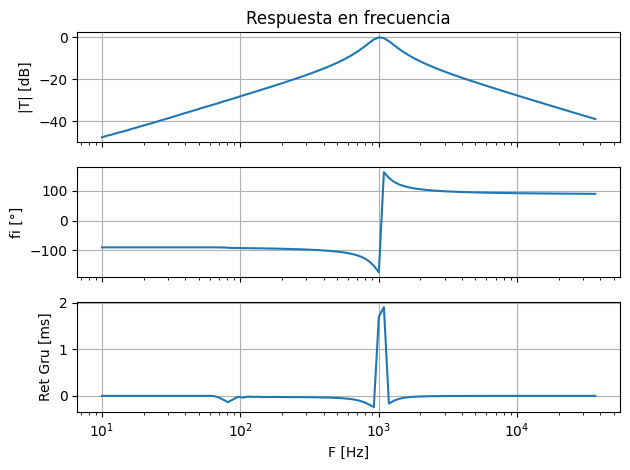

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Levanto .CSV en DataFrames
data_vo_vi = pd.read_csv('MedicionesModuloAudio.csv', delimiter=',')
data_fase = pd.read_csv('MedicionesFaseAudio.csv', delimiter=',')

# Leo para rta en modulo
frequencies_vo_vi = data_vo_vi['F']
vo = data_vo_vi['Vac']

# Leo para rta en fase
frequencies_fase = data_fase['F']
desfase = data_fase['fase']
desfase[0:24] = -90 # NOTA estas mediciones se cargaron en forma erronea siendo no representativas del filtro real
#Para poder conservar las escalas en frecuencia se completa con el ultimo valor correcto de la medicion


# Calcular la derivada del desfasaje respecto a la frecuencia
derivada_desfasaje = np.gradient(desfase, frequencies_fase)

# Hago figura con 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

# Subplot 1: Curva Modulo
ax1.semilogx(frequencies_vo_vi, vo)
ax1.set_ylabel('|T| [dB]')
ax1.set_title('Respuesta en frecuencia')
ax1.grid(True)

# Subplot 2: Curva Fase
ax2.semilogx(frequencies_fase, desfase)
ax2.set_ylabel('fi [°]')
ax2.grid(True)

# Subplot 3: Retardo de Grupo
ax3.semilogx(frequencies_fase, derivada_desfasaje)
ax3.set_xlabel('F [Hz]')
ax3.set_ylabel('Ret Gru [ms]')
ax3.grid(True)

# Ajustar la disposición de los subplots
plt.tight_layout()

# Mostrar la gráfica
plt.show()
